In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/streaming_data.csv'
df = pd.read_csv(file_path)

In [4]:
print("Descrição Estatística:")
print(df.describe(include='all'))

print("\nTipos de Dados:")
print(df.info())

print("\nValores Faltantes:")
print(df.isna().sum())

Descrição Estatística:
                 Age Gender  Time_on_platform  Devices_connected  \
count   66607.000000  63368      56464.000000       52696.000000   
unique           NaN      2               NaN                NaN   
top              NaN   Male               NaN                NaN   
freq             NaN  31796               NaN                NaN   
mean       43.511072    NaN       4385.848505           2.995370   
std        15.043158    NaN       2526.580859           1.414072   
min        18.000000    NaN          0.000000           1.000000   
25%        30.000000    NaN       2196.000000           2.000000   
50%        43.000000    NaN       4384.000000           3.000000   
75%        57.000000    NaN       6573.000000           4.000000   
max        69.000000    NaN       8759.000000           5.000000   

       Subscription_type  Num_streaming_services  Num_active_profiles  \
count              52663             9572.000000         77884.000000   
unique        

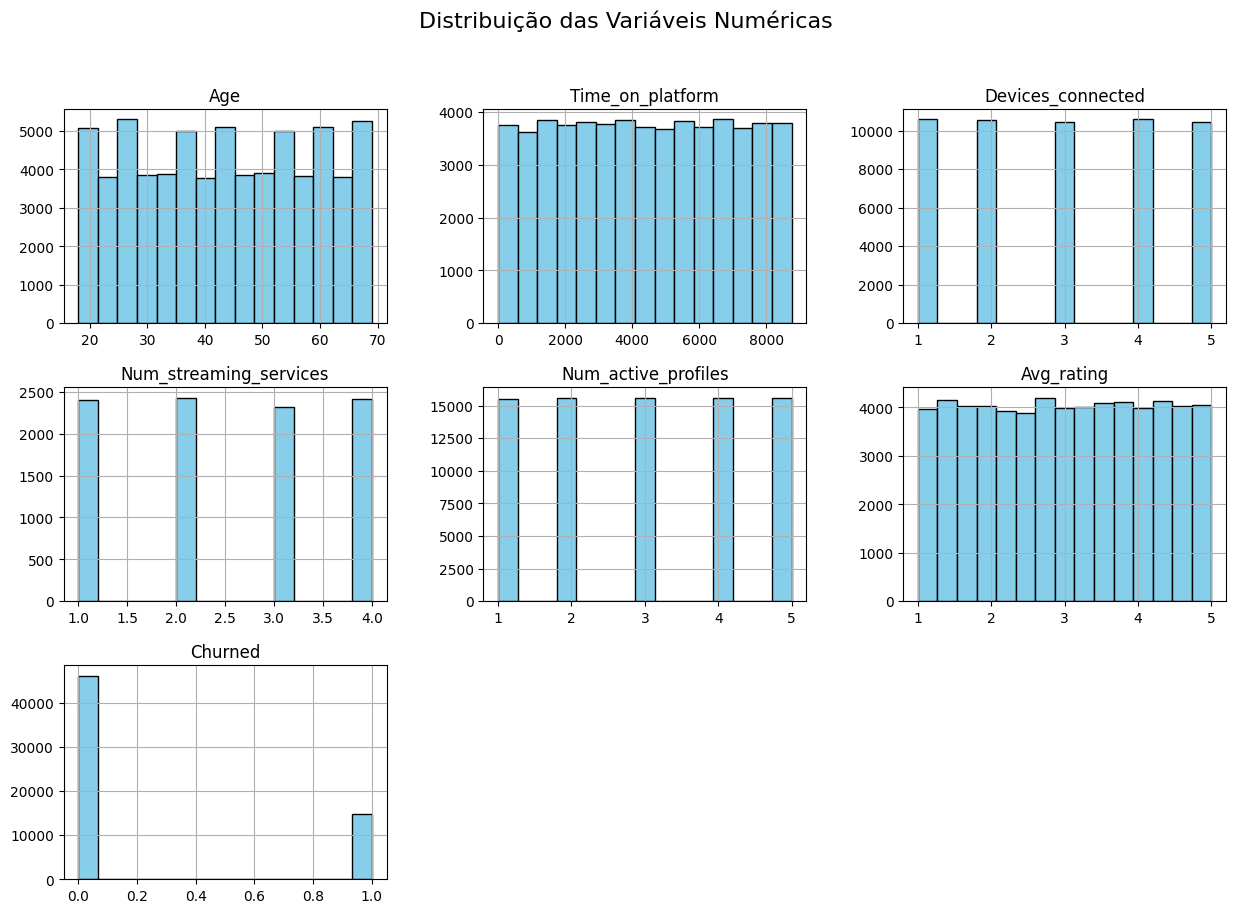

In [5]:
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()

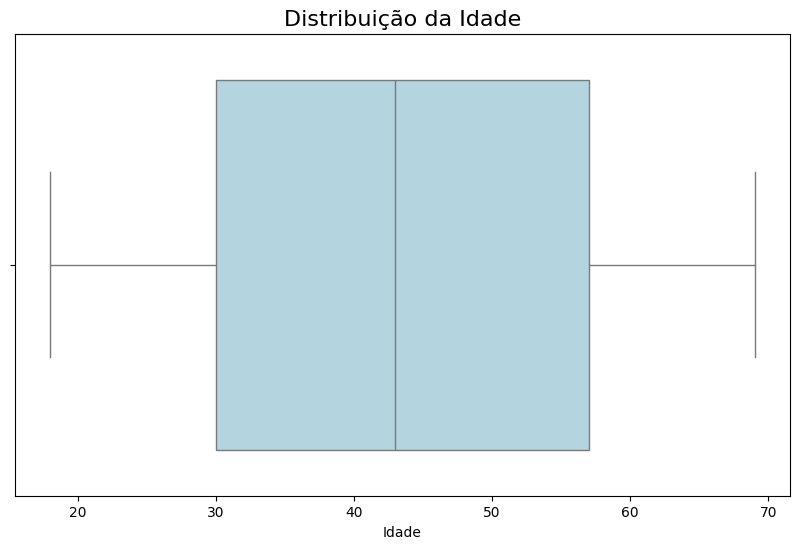

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df, color='lightblue')
plt.title('Distribuição da Idade', fontsize=16)
plt.xlabel('Idade')
plt.show()

<ipython-input-11-7502296e779f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


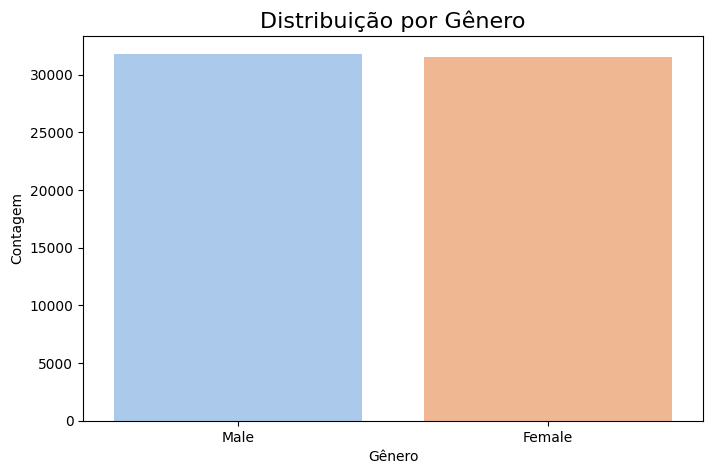

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribuição por Gênero', fontsize=16)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

In [12]:
columns_to_fill_zero = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[columns_to_fill_zero] = df[columns_to_fill_zero].fillna(0)

print("\nValores NaN substituídos por 0 nas colunas especificadas:")
print(df[columns_to_fill_zero].isna().sum())

columns_to_dropna = ['Gender', 'Subscription_type', 'Age']
df = df.dropna(subset=columns_to_dropna)

print("\nValores faltantes nas colunas obrigatórias após o drop:")
print(df[columns_to_dropna].isna().sum())

df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

print("\nValores únicos na coluna 'Churned' após transformação:")
print(df['Churned'].unique())

float_columns = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']
df[float_columns] = df[float_columns].astype(int)

print("\nTipos de dados após transformação:")
print(df.dtypes)

print("\nDataFrame tratado:")
print(df.head())



Valores NaN substituídos por 0 nas colunas especificadas:
Time_on_platform          0
Num_streaming_services    0
Churned                   0
Avg_rating                0
Devices_connected         0
dtype: int64

Valores faltantes nas colunas obrigatórias após o drop:
Gender               0
Subscription_type    0
Age                  0
dtype: int64

Valores únicos na coluna 'Churned' após transformação:
['No' 'Yes']

Tipos de dados após transformação:
Age                       float64
Gender                     object
Time_on_platform            int64
Devices_connected           int64
Subscription_type          object
Num_streaming_services      int64
Num_active_profiles         int64
Avg_rating                  int64
Churned                    object
User_id                    object
dtype: object

DataFrame tratado:
    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male              4700                  3             Basic   
1  69.0  Female       

<ipython-input-12-4c3ea531a451>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})
<ipython-input-12-4c3ea531a451>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_columns] = df[float_columns].astype(int)


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [14]:
categorical_columns = ['Gender', 'Subscription_type', 'Churned']
label_encoder = LabelEncoder()
df['Churned'] = label_encoder.fit_transform(df['Churned'])

y = df['Churned']

X = pd.get_dummies(df.drop(columns=['Churned', 'User_id']), drop_first=True)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-14-9f904e7242d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = label_encoder.fit_transform(df['Churned'])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

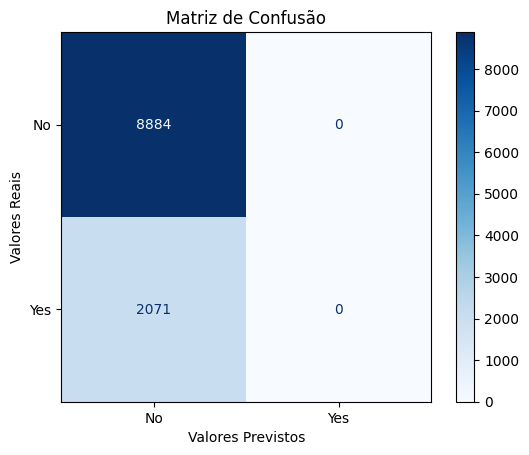

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusão")
disp.ax_.set_xlabel("Valores Previstos")
disp.ax_.set_ylabel("Valores Reais")
plt.show()

In [17]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.81      1.00      0.90      8884
         Yes       0.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.41      0.50      0.45     10955
weighted avg       0.66      0.81      0.73     10955



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
label_encoder = LabelEncoder()

df['Churned'] = label_encoder.fit_transform(df['Churned'])

X = pd.get_dummies(df.drop(columns=['Churned', 'User_id']), drop_first=True)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = df['Churned']

<ipython-input-18-e3d2e948c05a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = label_encoder.fit_transform(df['Churned'])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['Real_Churned'] = y_test.values
X_test_df['Predicted_Churned'] = y_pred

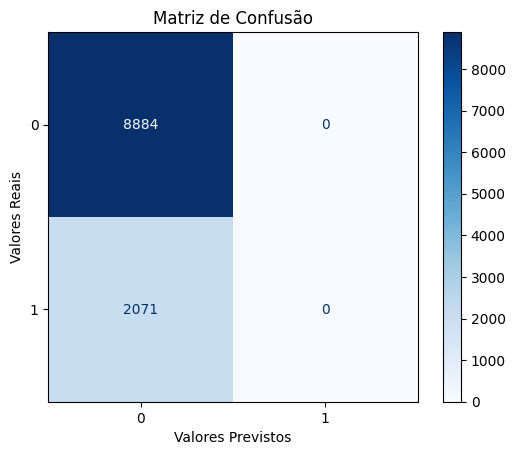

Distribuição das classes no conjunto de treino:
Churned
0    29459
1     7056
Name: count, dtype: int64

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.81      1.00      0.90      8884
         Yes       0.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.41      0.50      0.45     10955
weighted avg       0.66      0.81      0.73     10955


DataFrame com previsões:
        Age  Time_on_platform  Devices_connected  Num_streaming_services  \
0  0.490196          0.706131                0.6                     0.0   
1  0.980392          0.492636                0.6                     0.0   
2  0.274510          0.097500                0.0                     0.0   
3  0.411765          0.812992                0.0                     0.0   
4  0.235294          0.303573                0.8                     0.0   

   Num_active_profiles  Avg_rating  Gender_Male  Subscrip

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusão")
disp.ax_.set_xlabel("Valores Previstos")
disp.ax_.set_ylabel("Valores Reais")
plt.show()

print("Distribuição das classes no conjunto de treino:")
print(y.value_counts())

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

print("\nDataFrame com previsões:")
print(X_test_df.head())

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


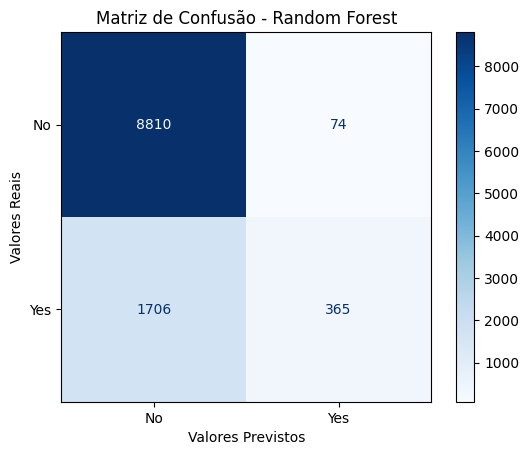


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

          No       0.84      0.99      0.91      8884
         Yes       0.83      0.18      0.29      2071

    accuracy                           0.84     10955
   macro avg       0.83      0.58      0.60     10955
weighted avg       0.84      0.84      0.79     10955



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nMelhores hiperparâmetros:", best_params)

best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['No', 'Yes'])
disp_rf.plot(cmap='Blues')
disp_rf.ax_.set_title("Matriz de Confusão - Random Forest")
disp_rf.ax_.set_xlabel("Valores Previstos")
disp_rf.ax_.set_ylabel("Valores Reais")
plt.show()

print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))